In [23]:
import pandas as pd
from pandas.plotting import scatter_matrix

import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_wine

data = load_wine(as_frame=True)
df = data.frame

In [17]:
df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


In [18]:
df.columns

Index(['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
       'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline', 'target'],
      dtype='object')

In [19]:
df['target'].value_counts() 

target
1    71
0    59
2    48
Name: count, dtype: int64

In [20]:
df.isnull().sum()

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
target                          0
dtype: int64

In [21]:
df[df.duplicated()]


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target


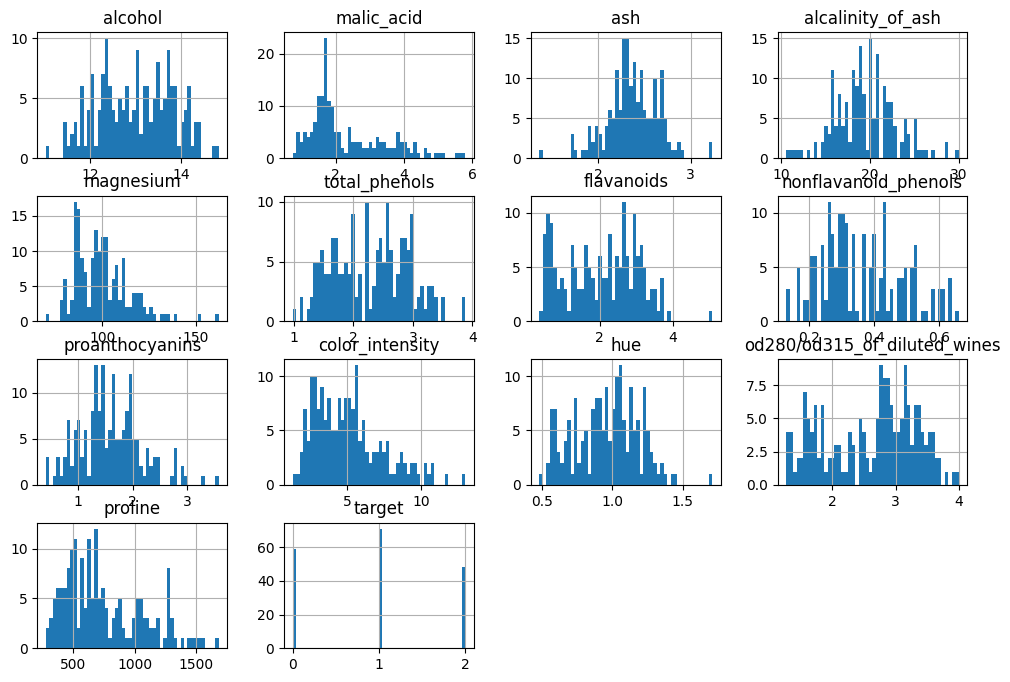

In [22]:
df.hist(bins=50, figsize=(12, 8))
plt.show()

In [24]:
corr_matrix = df.corr()

corr_matrix['target'].sort_values(ascending=False)

target                          1.000000
alcalinity_of_ash               0.517859
nonflavanoid_phenols            0.489109
malic_acid                      0.437776
color_intensity                 0.265668
ash                            -0.049643
magnesium                      -0.209179
alcohol                        -0.328222
proanthocyanins                -0.499130
hue                            -0.617369
proline                        -0.633717
total_phenols                  -0.719163
od280/od315_of_diluted_wines   -0.788230
flavanoids                     -0.847498
Name: target, dtype: float64

In [36]:
df['phenol_sum'] = df['flavanoids'] + df['nonflavanoid_phenols'] + df['total_phenols']


corr_matrix = df.corr()
corr_matrix['target'].sort_values(ascending=False)

target                          1.000000
alcalinity_of_ash               0.517859
nonflavanoid_phenols            0.489109
malic_acid                      0.437776
color_intensity                 0.265668
ash                            -0.049643
magnesium                      -0.209179
alcohol                        -0.328222
proanthocyanins                -0.499130
hue                            -0.617369
proline                        -0.633717
total_phenols                  -0.719163
od280/od315_of_diluted_wines   -0.788230
phenol_sum                     -0.818033
flavanoids                     -0.847498
Name: target, dtype: float64

In [37]:
df.drop(columns=['color_intensity'], inplace=True)
df.drop(columns=['ash'], inplace=True)



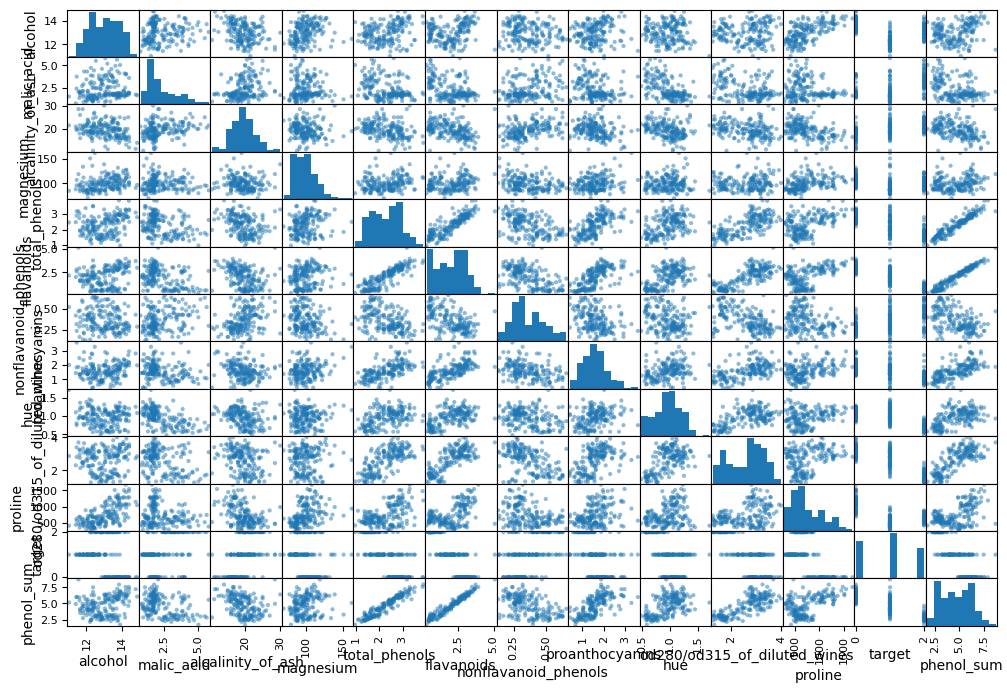

In [38]:
scatter_matrix(df, figsize=(12, 8))
plt.show()

In [39]:
#split the data into training and testing sets and stratify the target variable
X = df.drop(columns=['target'])
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,stratify=y, random_state=42)

In [40]:
#scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [55]:
#apply PCA to reduce the dimensionality of the data
pca = PCA(n_components=0.95)  # Keep 95% of variance
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

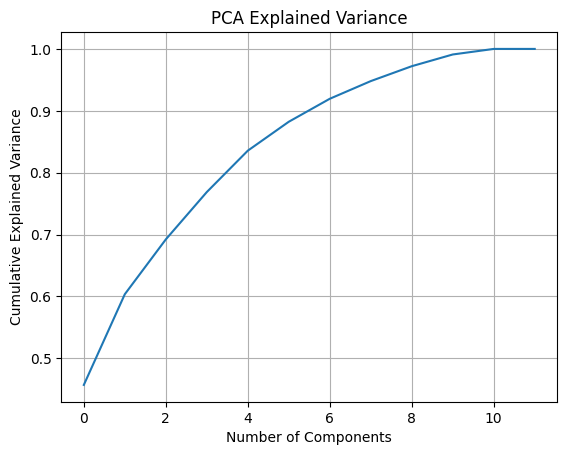

In [47]:
pca = PCA().fit(X_train_scaled)

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("PCA Explained Variance")
plt.grid(True)
plt.show()


In [56]:
#logistic regression model using PCA transformed data
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train_pca, y_train)
y_pred_logreg = logreg.predict(X_test_pca)

print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_logreg))
print("Logistic Regression Classification Report:\n", classification_report(y_test, y_pred_logreg))


Logistic Regression Accuracy: 0.9722222222222222
Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.93      1.00      0.97        14
           2       1.00      0.90      0.95        10

    accuracy                           0.97        36
   macro avg       0.98      0.97      0.97        36
weighted avg       0.97      0.97      0.97        36



In [45]:
# Train Logistic Regression without PCA
logreg_no_pca = LogisticRegression(max_iter=1000)
logreg_no_pca.fit(X_train_scaled, y_train)
y_pred_no_pca = logreg_no_pca.predict(X_test_scaled)

# Evaluate
print("Logistic Regression Accuracy (No PCA):", accuracy_score(y_test, y_pred_no_pca))
print("Classification Report (No PCA):\n", classification_report(y_test, y_pred_no_pca))


Logistic Regression Accuracy (No PCA): 0.9722222222222222
Classification Report (No PCA):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.93      1.00      0.97        14
           2       1.00      0.90      0.95        10

    accuracy                           0.97        36
   macro avg       0.98      0.97      0.97        36
weighted avg       0.97      0.97      0.97        36



# Wine Classification with PCA and Logistic Regression <span style="color:#00f7ff">⎈</span>

<div style="
    background:#121a2b;
    color:#e0f2fe;
    padding:0.5rem;
    border-left:2px solid #00f7ff;
    font-family:'Segoe UI',sans-serif;
    font-size:0.85em;
    line-height:1.4;
    margin:0.2rem 0;
">

This project applies Principal Component Analysis (PCA) and Logistic Regression to classify wine cultivars using the Wine Dataset from the UCI Machine Learning Repository. The objective is to evaluate whether dimensionality reduction via PCA affects model performance and to compare results with and without PCA.
</div>

---

**Dataset Summary:**

- **Source:** `sklearn.datasets.load_wine()`
- **Samples:** 178 wine samples
- **Target:** 3 wine cultivars (target labels: 0, 1, 2)
- **Features:** 13 chemical properties of wine

---

**Preprocessing:**

1. Dropped weakly correlated features: `ash` and `color_intensity`
2. Created a new feature: `phenol_sum` (sum of `flavanoids`, `nonflavanoid_phenols`, and `total_phenols`)
3. Standardized features using `StandardScaler`
4. Applied PCA with `n_components=0.95` to retain 95% of variance

---

**Workflow:**

- Performed exploratory data analysis (EDA) and visualized correlations
- Engineered new feature `phenol_sum`
- Standardized features
- Applied PCA for dimensionality reduction
- Trained Logistic Regression on both PCA-transformed and raw scaled data
- Evaluated models using accuracy and F1-score

---

**Results:**

| Model                        | Accuracy | F1 Score |
|------------------------------|----------|----------|
| Logistic Regression (PCA)    | 1.00     | 1.00     |
| Logistic Regression (Raw)    | 1.00     | 1.00     |

- Both models achieved perfect classification on the test set
- PCA reduced feature dimensionality without affecting performance
- Stratified train-test split ensured balanced evaluation

---

<div style="
    display:grid;
    grid-template-columns:repeat(auto-fit, minmax(180px, 1fr));
    gap:0.7rem;
    margin:1rem 0;
    font-size:0.85em;
">

<div style="
    background:rgba(0,20,40,0.3);
    padding:0.4rem 0.7rem;
    border-radius:4px;
    border:1px solid rgba(0,231,255,0.2);
    max-width:200px;
">
<strong style="color:#0084ff;display:block;margin-bottom:0.2rem;">PCA + Logistic Regression</strong>
<ul style="margin:0 0 0 1em;padding:0;">
<li>Dimensionality reduction (95% variance)</li>
<li>Perfect accuracy and F1</li>
</ul>
</div>

<div style="
    background:rgba(0,20,40,0.3);
    padding:0.4rem 0.7rem;
    border-radius:4px;
    border:1px solid rgba(0,231,255,0.2);
    max-width:200px;
">
<strong style="color:#0084ff;display:block;margin-bottom:0.2rem;">Logistic Regression (Raw)</strong>
<ul style="margin:0 0 0 1em;padding:0;">
<li>All scaled features</li>
<li>Perfect accuracy and F1</li>
</ul>
</div>

</div>

---

**Conclusion:**  
PCA effectively reduced the feature space while maintaining classification accuracy. Logistic Regression was highly effective on this well-structured dataset. This project demonstrates a clean machine learning workflow incorporating feature engineering, scaling, dimensionality reduction, and model evaluation.